# Arima Forecasting

## Importing the libraries

In [56]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [57]:
df = pd.read_excel("ts_data/ts_data.xlsx")


In [58]:
print(df.head())

   Employee_ID year_month  Annual_load_cost_per_month
0           57    2000-07                      9329.0
1           57    2000-08                      9329.0
2           57    2000-09                      9329.0
3           57    2000-10                      9329.0
4           57    2000-11                      9329.0


In [59]:
print(df.columns)

Index(['Employee_ID', 'year_month', 'Annual_load_cost_per_month'], dtype='object')


In [60]:
print(df.dtypes)

Employee_ID                     int64
year_month                     object
Annual_load_cost_per_month    float64
dtype: object


In [61]:
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

In [62]:
print(df.dtypes)

Employee_ID                            int64
year_month                    datetime64[ns]
Annual_load_cost_per_month           float64
dtype: object


In [63]:
print(df.shape)

(30000, 3)


## 100 Different Data Frame For Individual User

In [64]:
unique_employees = df['Employee_ID'].unique()
print(unique_employees)

[ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156]


In [65]:
employee_dfs = {}

# Step 4: Loop through each employee ID
for emp_id in unique_employees:
    # Step 5: Filter data for just this employee
    emp_df = df[df['Employee_ID'] == emp_id]

    # Step 6: Save it into the dictionary
    employee_dfs[emp_id] = emp_df

In [66]:
individual_emp = employee_dfs[58]
print(individual_emp)

     Employee_ID year_month  Annual_load_cost_per_month
300           58 2000-07-01                     5427.00
301           58 2000-08-01                     5427.00
302           58 2000-09-01                     5427.00
303           58 2000-10-01                     5427.00
304           58 2000-11-01                     5427.00
..           ...        ...                         ...
595           58 2025-02-01                     7743.84
596           58 2025-03-01                     7743.84
597           58 2025-04-01                     7743.84
598           58 2025-05-01                     7743.84
599           58 2025-06-01                     7743.84

[300 rows x 3 columns]


In [67]:
print(individual_emp.shape)

(300, 3)


## Forecasting with SARIMAX But without exogenous variable

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def forecast_sarima(emp_df, steps=12):
    # Step 1: Ensure year_month is datetime
    emp_df['year_month'] = pd.to_datetime(emp_df['year_month'])

    # Step 2: Set date as index and sort
    emp_df = emp_df.sort_values('year_month').set_index('year_month')

    # Step 3: Extract the series
    y = emp_df['Annual_load_cost_per_month']

    # Step 4: Fit SARIMA model
    model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Step 5: Forecast
    forecast = model_fit.forecast(steps=steps)

    return forecast

In [ ]:
employee_forecasts = {}

for emp_id, emp_df in employee_dfs.items():
    try:
        forecast = forecast_sarima(emp_df, steps=12)
        employee_forecasts[emp_id] = forecast
    except Exception as e:
        print(f"Failed for Employee {emp_id}: {e}")

In [75]:
print(employee_forecasts[58])

2025-07-01    7746.633236
2025-08-01    7746.633237
2025-09-01    7746.633237
2025-10-01    7746.633237
2025-11-01    7746.633237
2025-12-01    7747.528119
2026-01-01    7747.528119
2026-02-01    7747.528119
2026-03-01    7747.528119
2026-04-01    7747.528119
2026-05-01    7861.816476
2026-06-01    7861.816470
Freq: MS, Name: predicted_mean, dtype: float64


## Plot Prediction of Single Employee|

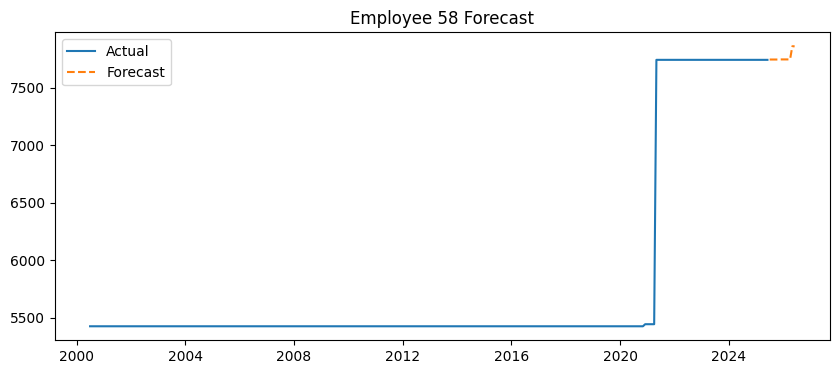

In [74]:
import matplotlib.pyplot as plt

emp_id = 58
emp_df = employee_dfs[emp_id].copy()
emp_df['year_month'] = pd.to_datetime(emp_df['year_month'])
emp_df.set_index('year_month', inplace=True)

forecast = employee_forecasts[emp_id]

plt.figure(figsize=(10, 4))
plt.plot(emp_df['Annual_load_cost_per_month'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f'Employee {emp_id} Forecast')
plt.legend()
plt.show()